In [1]:
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 9)

from tim2 import TIM2, TIM2_Dataset
from torch.utils.data import DataLoader

In [2]:
files = sorted(glob('data/trades_*.csv'))

In [3]:
s = []
r = []
e = []

for file in files:
    data = pd.read_csv(file)
    r.append(np.diff(np.log(data.midprice.values)))
    s.append(data.side.values[:-1])
    e.append(data.is_price_cancelling.values[:-1])

In [4]:
n = 100
model_moments = TIM2(n=n, method='moments')
model_moments.fit(s[:-5], e[:-5], r[:-5])

model_sgd = TIM2(n=n, method='sgd')
model_sgd.fit(s[:-5], e[:-5], r[:-5])

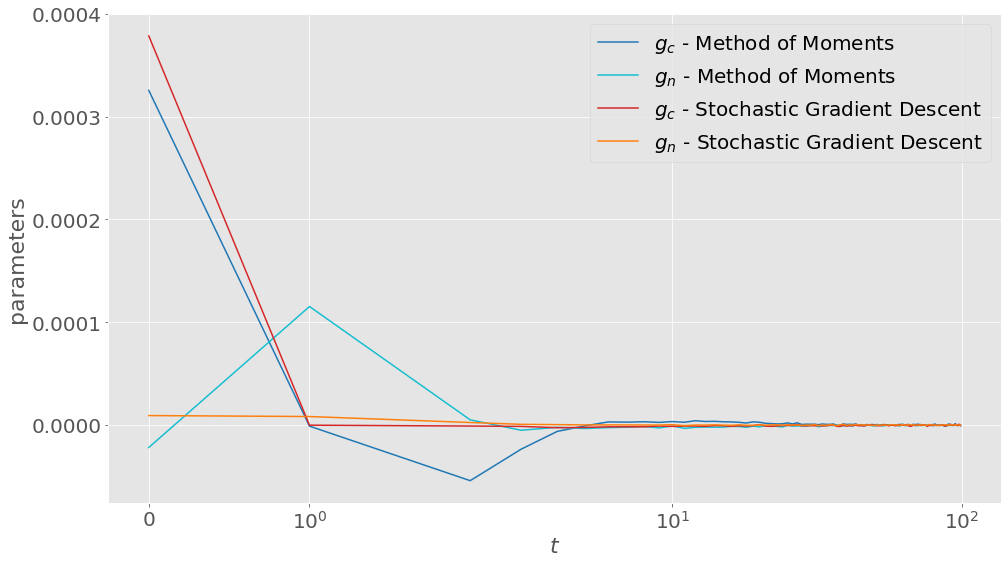

In [5]:
x = np.arange(0, n)
y = model_moments.parameters['c']

plt.plot(x, y, color='tab:blue')

y = model_moments.parameters['n']

plt.plot(x, y, color='tab:cyan')

y = model_sgd.parameters['c']

plt.plot(x, y, color='tab:red')

y = model_sgd.parameters['n']

plt.plot(x, y, color='tab:orange')

plt.xscale('symlog')

plt.legend([
    '$g_c$ - Method of Moments',
    '$g_n$ - Method of Moments',
    '$g_c$ - Stochastic Gradient Descent',
    '$g_n$ - Stochastic Gradient Descent'
], fontsize=20)
plt.xlabel('$t$', fontsize=22)
plt.ylabel('parameters', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('tim2_params')
plt.show()

In [6]:
params_count = []
r2_moments = []
r2_sgd = []

for n in [1, 2] + list(np.arange(3, 16, 2)) + list(np.arange(16, 128, 8)):
    print(n, end=' ')
    model_moments = TIM2(n=n, method='moments')
    model_moments.fit(s[:-5], e[:-5], r[:-5])
    model_sgd = TIM2(n=n, method='sgd')
    model_sgd.fit(s[:-5], e[:-5], r[:-5])
    params_count.append(n)
    r2_moments.append(model_moments.score(s[-5:], e[-5:], r[-5:]))
    r2_sgd.append(model_sgd.score(s[-5:], e[-5:], r[-5:]))

1 2 3 5 7 9 11 13 15 16 24 32 40 48 56 64 72 80 88 96 104 112 120 

[]

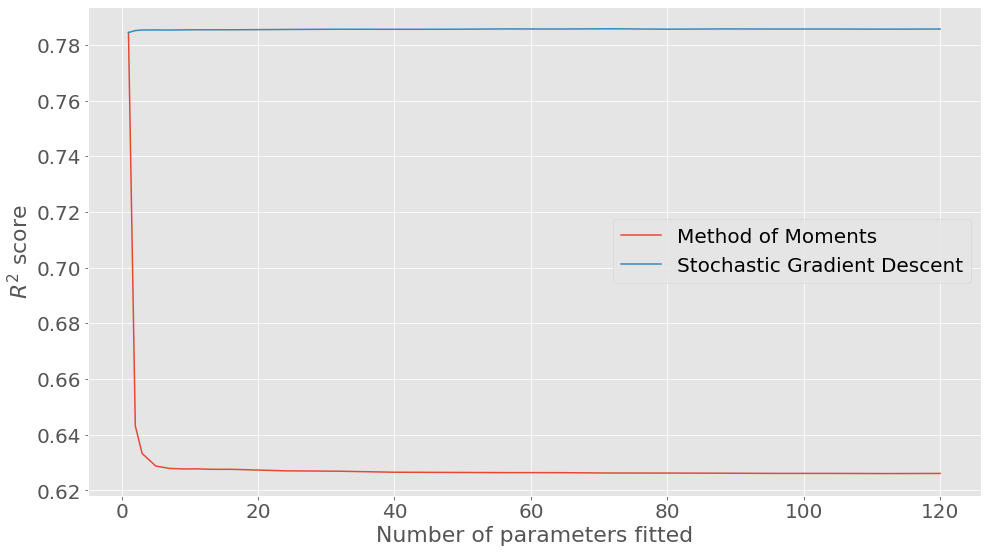

In [7]:
plt.plot(params_count, r2_moments)
plt.plot(params_count, r2_sgd)

plt.xlabel('Number of parameters fitted', fontsize=22)
plt.ylabel('$R^2$ score', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Method of Moments', 'Stochastic Gradient Descent'], fontsize=20)

plt.savefig('tim2_scores')
plt.plot()

In [8]:
np.argmax(r2_moments)

0

In [9]:
np.argmax(r2_sgd)

16

In [10]:
r2_sgd

[0.7844155001491551,
 0.7851109206686562,
 0.7853195910528664,
 0.7853383269776764,
 0.7853079266235334,
 0.7853761696804626,
 0.7854024951736304,
 0.7853910075404852,
 0.7854050374520548,
 0.7853975151077286,
 0.7855092909693043,
 0.7855979423263773,
 0.7855702589394125,
 0.7855894538159474,
 0.7857022905258542,
 0.7856757384042111,
 0.7857511138758496,
 0.7856099404518502,
 0.7857027828433505,
 0.7856702038188077,
 0.785672550827807,
 0.7856296659703498,
 0.7856665367332345]

In [11]:
len(r2_sgd)

23

In [12]:
model_sgd = TIM2(n=512, method='sgd')
model_sgd.fit(s[:-5], e[:-5], r[:-5])
model_sgd.score(s[-5:], e[-5:], r[-5:])

0.7857671522823947

In [13]:
model_sgd = TIM2(n=1024, method='sgd')
model_sgd.fit(s[:-5], e[:-5], r[:-5])
model_sgd.score(s[-5:], e[-5:], r[-5:])

0.7854674029307881